#신경망
- 비선형모델의 해석

## 신경망의 수식
O = XW+b

- Oi(nxp) : 행벡터
- X(nxd) : 데이터
- W(dxp) : 가중치 행렬
  - X에서 O로 가는 화살표
- b(nxp) : 절편



##Softmax

- 모델의 출력을 확률로 해석할 수 있게 변환
- 분류 문제에서 선형모델과 결합

In [4]:
import numpy as np
def softmax(vec) :
  denumerator = np.exp(vec - np.max(vec, axis=-1, keepdims=True))    # 각 출력 벡터의 값의 exp
  numerator = np.sum(denumerator, axis=-1, keepdims=True)      # 각 출력 벡터의 값의 exp의 합
  val = denumerator / numerator
  return val


vec = np.array([[1,2,0],[-1,0,1],[-10,0,10]])

softmax(vec)

array([[2.44728471e-01, 6.65240956e-01, 9.00305732e-02],
       [9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

학습이 아닌 추론의 경우는 one-hot vector를 사용하여 최댓값을 가진 주소만 1로 출력

In [5]:
def one_hot(val,dim) :
  return [np.eye(dim)[_] for _ in val]

def one_hot_encoding(vec) :
  vec_dim = vec.shape[1]
  vec_argmax = np.argmax(vec,axis=-1)
  return one_hot(vec_argmax, vec_dim)

# 신경망
- 선형모델과 활성함수의 합성 함수


H = a(Wx+b)
- 활성함수 a는 비선형함수로 잠재벡터z의 각 노드에 개별적으로 적용하여 새로운 잠재벡터 H를 만든다

## 활성함수
- R 위에 정의된 비선형 함수
- sigmoid, tanh, relu등


2 layer NN
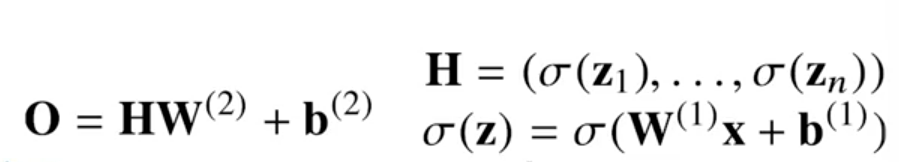

다층 퍼셉트론은 신경망이 여러층 합성된 함수

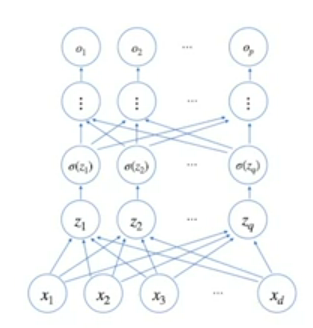![image.png](#)

### 층을 여러개 쌓는 이유

- 층이 깊을수록 목적함수를 근사하는데 필요한 뉴런의 숫자가 빨리 감소하여 효율적인 학습이 가능
- 층이 얇으면 필요한 뉴런의 숫자가 기하급수적으로 늘어나며 넓은 신경망이 된다.

# 역전파 알고리즘

- 역전파를 사용하여 각 층에 사용된 parameter를 학습
- 손실함수를 L이라 할때 aL/aW(l)의 정보를 계산
- 각 층 패머리터의 그레디언트 벡터는 윗층부터 역순으로 계산
- 역전파는 연쇄법칙을 통해 전달


O = Z(L)

H(l) = a(Z(l)

z(l) = h(l-1)w(l)+b(l)

...

z(1) = xw(1)+b(1)


## 연쇄법칙
- 합성함수의 미분법
- 역전파는 연쇄법칙 기반 자동미분을 사용

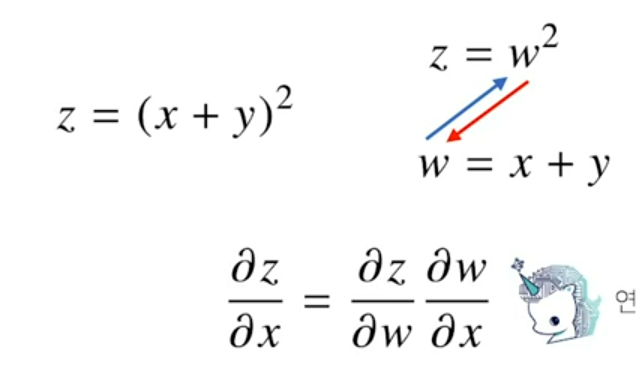

각 노드의 텐서(각 뉴런에 해당하는 값) 값을 컴퓨터가 기억해야 미분 계산이 가능 _ 이는 메모리에 저장됨

- 미분값에 필요한 모든 값을 저장해놔야 하기 때문에 backward가 더 많은 메모리를 사용함